# Covid-19  -  Visualization

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [3]:
data_covid = pd.read_csv("New_Data\Covid_new.csv")
data_covid.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,Active Cases/1M pop
0,Afghanistan,176229,7643.0,158429.0,10157.0,4361.0,189.0,904261,22376.0,40411760,Asia,251.0
1,Albania,272663,3485.0,268359.0,819.0,94923.0,1213.0,1760359,612837.0,2872476,Europe,285.0
2,Algeria,265432,6864.0,178050.0,80518.0,5874.0,152.0,230861,5109.0,45191206,Africa,1782.0
3,Andorra,38794,152.0,37925.0,717.0,500736.0,1962.0,249838,3224798.0,77474,Europe,9255.0
4,Angola,98927,1900.0,96857.0,170.0,2860.0,55.0,1463343,42299.0,34595276,Africa,5.0


In [4]:
data_covid.columns.tolist()

['Country,Other',
 'TotalCases',
 'TotalDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 'Active Cases/1M pop']

In [5]:
data_covid.shape

(211, 12)

* Tóm tắt


|Thuộc tính|Kiểu dữ liệu|     Ý nghĩa   
|:--------:|:-------------:|:-----:
|**Country,Other**|Chuỗi|Đất nước lấy thông tin|
|**TotalCases**|Số nguyên|Số lượng toàn bộ người bị nhiễm|
|**TotalDeaths**|Số nguyên|Tổng số lượng ca tử vong do Covid-19|
|**TotalRecovered**|Số nguyên|Tổng số lượng ca hồi phục khi bị nhiễm Covid-19|
|**ActiveCases**|Số nguyên|Số lượng người bị nhiễm và chưa khỏi bệnh|     
|**Tot Cases/1M pop**|Số nguyên|Tổng số ca được xác nhận nhiễm trên 1 triệu dân số|
|**Deaths/1M pop**|Số nguyên|Tổng số ca tư vong trên 1 triệu dân số|
|**TotalTests**|Số nguyên|Tổng số lượng được xác nghiệm Covid-19|
|**Tests/1M pop**|Số nguyên|Tổng số lượng được xác nghiệm Covid-19 trên 1 triệu dân số|   
|**Population**|Số nguyên|Tổng số dân số của đất nước|   
|**Continent**|Chuỗi|Tên châu lục| 
|**Active Cases/1M pop**|Số nguyên|Tổng số lương ca nhiễm chưa khỏi bệnh trên 1 triệu dân số|

### 1. Ta tiến hành so sánh đại dịch `COVID-19` với 3 dịch bệnh trước đây

- `Bảng số liệu được lấy từ nguồn internet`

|Dịch bệnh|Số ca nhiễm|Số ca tử vong
|:--------:|:-------------:|:-----:
|**EBOLA**|28646|11323|
|**MERS**|8096|858|
|**SARS**|2494|774|

- Tiến hành xác định số ca nhiễm và số ca tử vong ở tới ngày `13/03/2022`

In [6]:
total_cases = int(data_covid["TotalCases"].sum())
total_deaths = int(data_covid["TotalDeaths"].sum())
print("So ca nhiem covid-19: ", total_cases)
print("So ca tu vong do covid-19: ", total_deaths)

So ca nhiem covid-19:  458025773
So ca tu vong do covid-19:  6063721


- Sử dụng biểu đồ `barchar` để trực quan

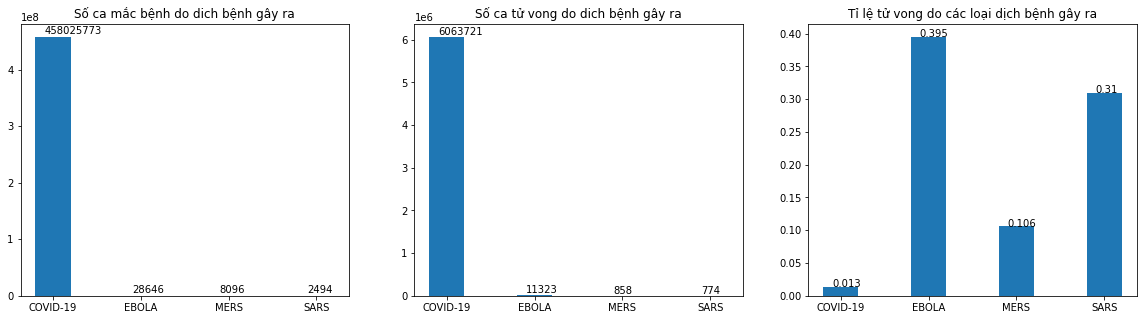

In [7]:
# xay dung du lieu
data_cases = {"COVID-19": total_cases, "EBOLA": 28646, "MERS": 8096, "SARS": 2494}
data_deaths = {"COVID-19": total_deaths, "EBOLA": 11323, "MERS": 858, "SARS": 774}

figure, axis = plt.subplots(1, 3, figsize = (20, 5))

axis[0].bar(list(data_cases.keys()), list(data_cases.values()), width=0.4)
axis[0].set_title("Số ca mắc bệnh do dich bệnh gây ra")
for i, v in enumerate(list(data_cases.values())):
    axis[0].text(i - 0.1, v + 5000000, str(v))
    
axis[1].bar(list(data_deaths.keys()), list(data_deaths.values()), width=0.4)
axis[1].set_title("Số ca tử vong do dich bệnh gây ra")
for i, v in enumerate(list(data_deaths.values())):
    axis[1].text(i - 0.1, v + 50000, str(v))
    
# create ti le
Ratio_list = []
list_deaths = list(data_deaths.values())
list_cases = list(data_cases.values())
for i in range(0, len(list_deaths)):
    Ratio_list.append(round(list_deaths[i] / list_cases[i], 3))

axis[2].bar(list(data_deaths.keys()), Ratio_list, width=0.4)
axis[2].set_title("Tỉ lệ tử vong do các loại dịch bệnh gây ra")
for i, v in enumerate(Ratio_list):
    axis[2].text(i - 0.1, v , str(v))
    
plt.show()

**Nhận xét:** Ta đã so sánh COVID_19 với 3 loại dịch bệnh ở 2 biểu đồ trên, ta thấy rõ rằng tốc độ lan truyền của COVID-19 là chưa từng có so với các loại dịch bệnh trước đây khi tỉ lệ mắc covid cao ngất ngưởng và đồng thời số người tử vong do `Covid-19` chiếm cao => cho thấy mức độ nguy hiểm của con virus `CORONA` này. Dựa vào mức độ `lây loan nhanh chóng` và `nguy hiểm` của **COVID-19** đã ảnh hưởng nặng nề đến thế giới trong 3 năm và chưa có dấu hiệu kết thúc.

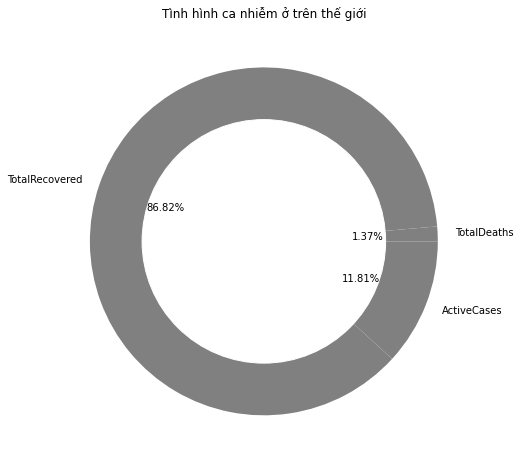

In [8]:
# Create data
labels = ["TotalDeaths", "TotalRecovered", "ActiveCases"]
tempt_value = []
for label in labels:
    tempt = int(data_covid[label].sum())
    tempt_value.append(tempt)

plt.figure(figsize = (14, 8))
colors = ["grey", "grey", "grey"]
plt.pie(tempt_value, labels = labels, autopct='%1.2f%%', colors=colors)
plt.title("Tình hình ca nhiễm ở trên thế giới")
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Nhận xét:** Ta thấy rõ được tỉ lệ phần phần tử vong do `COVID-19` không quá cao (1.37%) do sự phát triển của y học hiện đại đồng thời tác dụng của các loại vaccine qua đó đã hạn chế sự nguy hiển của Covid-19 

### 2. Xem xét châu lục có tỉ lệ ca nhiểm

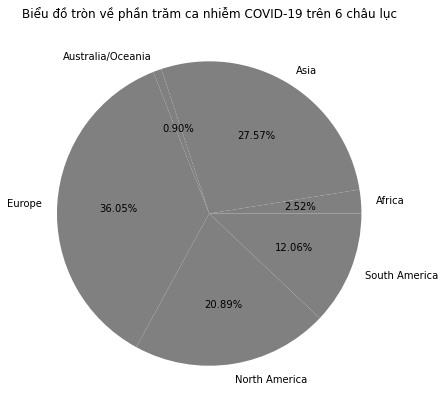

In [9]:
data = data_covid.groupby("Continent")["TotalCases"].sum()
tempt_value = list(data.values)
tempt_name_of_continents = list(data.keys())

colors = ["grey", "grey", "grey", "grey", "grey", "grey"]
plt.figure(figsize = (10, 7))
plt.pie(tempt_value, labels = tempt_name_of_continents, autopct='%1.2f%%', colors=colors)
plt.title("Biểu đồ tròn về phần trăm ca nhiễm COVID-19 trên 6 châu lục")
plt.show() 

**Nhận xét:** Tính tới ngày `13/03/2022`, Châu âu (Europe) chiếm tỉ lệ cao nhất `36.05%`, chiếm hơn 1/3 số ca nhiễm trên toàn thế giới, hiện nay châu âu được xem là tâm điểm của đại dịch. Theo thông tin của nhiều nguồn cho biết `Châu âu phải đối mặt với số ca nhiễm biến thể Omicron tăng lên`.

- Ta đặt ra giải thiết `tỉ lệ ca nhiễm tăng lên đó là do 1 vài nước trong châu âu phòng chống dịch bệnh chưa tốt` hay có thể là `biến thể Omicron nó lây lan nhanh hơn ở khí hậu của châu âu` . Ta sẽ sử dụng dữ liệu để tìm hiểu hiểu và cố gắng trả lời giả thiết này.

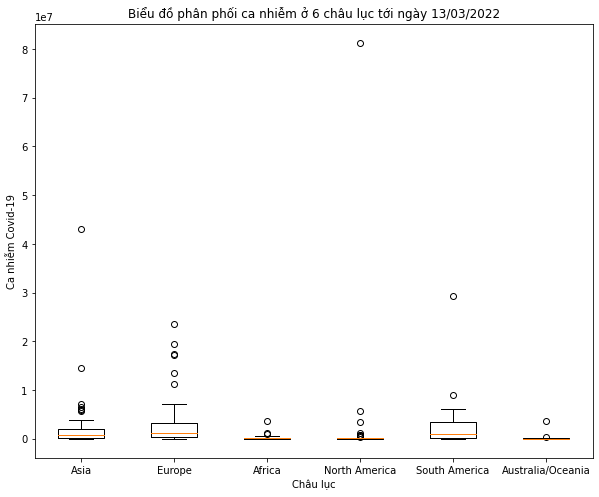

In [10]:
continents = data_covid["Continent"].unique()
value_box = []
for continent in continents:
    data_covid_continent = data_covid.loc[data_covid["Continent"] == continent]
    value_box.append(data_covid_continent["TotalCases"])

plt.figure(figsize = (10, 8))
plt.boxplot(value_box)
plt.xticks([1, 2, 3, 4, 5, 6], continents)

plt.title("Biểu đồ phân phối ca nhiễm ở 6 châu lục tới ngày 13/03/2022")
plt.ylabel("Ca nhiễm Covid-19")
plt.xlabel("Châu lục")
plt.show()

**Nhận xét:** Dựa vào `box plox`, ta thấy rõ ở `Europe` đã xuất hiện tới 5 outlier hình dung được giả thiết đầu tiên `tỉ lệ ca nhiễm tăng lên đó là do 1 vài nước trong châu âu phòng chống dịch bệnh chưa tốt` của ta đã đúng giải thích rõ ràng tại sao tổng số ca nhiễm của châu âu lại chiếm tới 1/3 so với thế giới. Kèm theo đó có 1 điều đặc biệt ở `North America` xuất hiện 1 outlier lớn qua đó do 1 mình outlier đó đã kéo số người nhiễm trung bình ở châu mĩ (North America) tăng mạnh.

### 3. Số ca nhiễm của 20 nước cao nhất vào ngày 13/03/2022

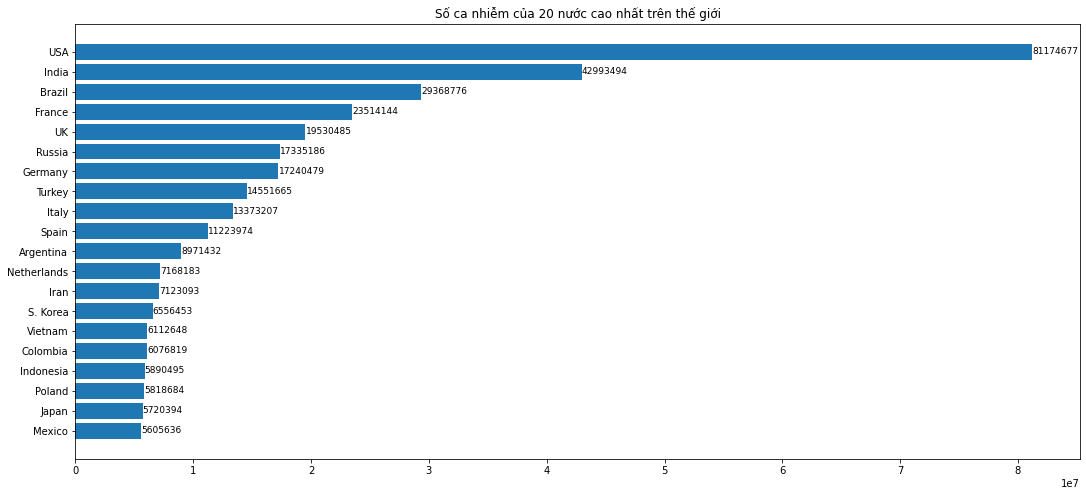

In [11]:
tempt_data = data_covid.sort_values(by=["TotalCases"], ascending=False)[0:20]
tempt_data = tempt_data.sort_values(by=["TotalCases"], ascending=True)
plt.figure(figsize = (18, 8))
plt.barh(tempt_data["Country,Other"], tempt_data["TotalCases"])

for i, v in enumerate(tempt_data["TotalCases"]):
    plt.text(v, i - 0.1, str(v), fontsize = 9)

plt.title("Số ca nhiễm của 20 nước cao nhất trên thế giới")
plt.show()

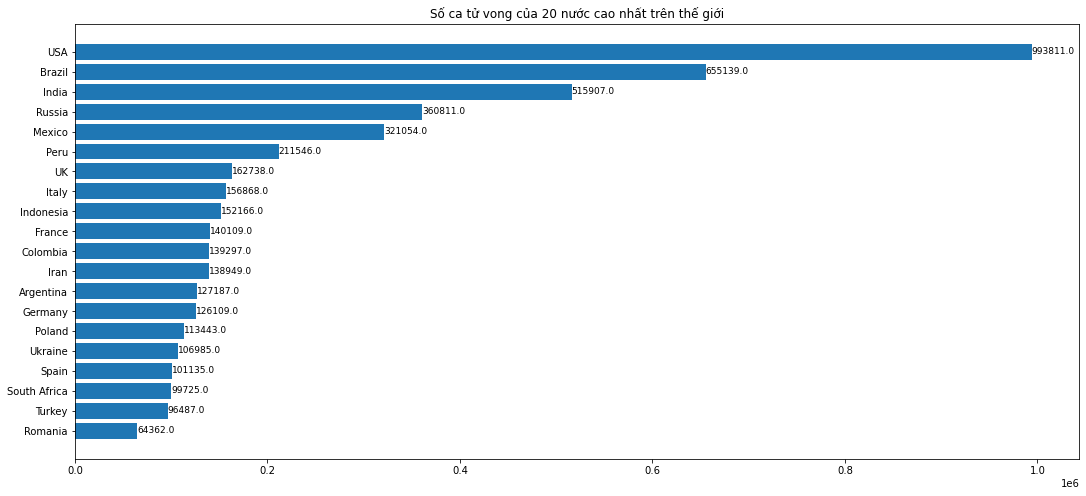

In [12]:
tempt_data = data_covid.sort_values(by=["TotalDeaths"], ascending=False)[0:20]
tempt_data = tempt_data.sort_values(by=["TotalDeaths"], ascending=True)
plt.figure(figsize = (18, 8))
plt.barh(tempt_data["Country,Other"], tempt_data["TotalDeaths"])

for i, v in enumerate(tempt_data["TotalDeaths"]):
    plt.text(v, i - 0.1, str(v), fontsize = 9)

plt.title("Số ca tử vong của 20 nước cao nhất trên thế giới")
plt.show()

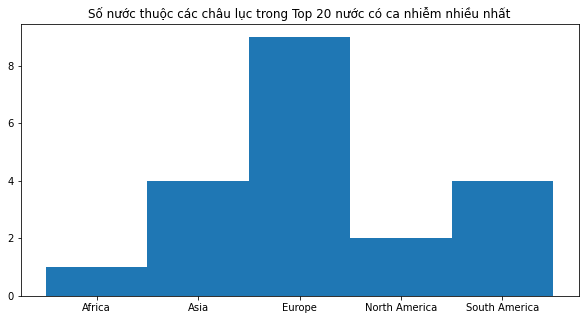

In [13]:
tempt_countries = tempt_data.groupby("Continent")["Country,Other"].count()
tempt_name_of_continents = list(tempt_countries.keys())
tempt_values = list(tempt_countries.values)

plt.figure(figsize = (10, 5))
plt.bar(tempt_name_of_continents, tempt_values, width=1)
plt.title("Số nước thuộc các châu lục trong Top 20 nước có ca nhiễm nhiều nhất")
plt.show()

**Nhận xét:** `Mỹ` vẫn chiếm ngôi vị đầu với số ca nhiễm nhiều nhất trên thế giới và gần như là gấp đôi so với nước đứng thứ 2 là `Ấn độ`. Ở trong `histogram` ta thấy châu âu (Europe) có nhiều nước trong top 20 nhất (9 nước) => Qua đó ta có thể giải thích lý do tại sao `châu âu` lại chiếm tỉ lệ nhiễm 1/3 so với thế giới. Đồng thời giả thiết đầu tiên của ta đặt ra là đúng: `tỉ lệ ca nhiễm tăng lên đó là do 1 vài nước trong châu âu phòng chống dịch bệnh chưa tốt`

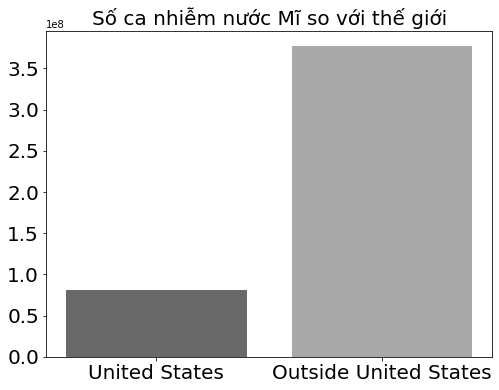

In [14]:
totalcases = data_covid['TotalCases'].sum()
us_confirmed = data_covid[data_covid['Country,Other']=='USA']['TotalCases'].sum()
outside_US = totalcases - us_confirmed

plt.figure(figsize=(8, 6))
plt.bar('United States', us_confirmed, color="dimgray")
plt.bar('Outside United States', outside_US, color="darkgrey")
plt.title('Số ca nhiễm nước Mĩ so với thế giới', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Nhận xét:** Ta có thể thấy số ca nhiễm của Hoa Kỳ bằng 1/5 so với thế giới vượt xa so với các nước Bắc Mĩ khác. Nguyên nhân chính chủ yếu là người dân Mĩ không tuân thủ những quy định hướng dẫn phòng chóng Covid của chính phủ. Từ đó có thể thấy nước Mĩ tăng về số ca nhiễm sẽ dẫn đến số ca nhiễm của cả Bắc Mĩ tăng đáng kể 

### 4.  Biểu diễn mức độ khỏi bệnh và tử vong của 20 nước có ca nhiễm cao nhất

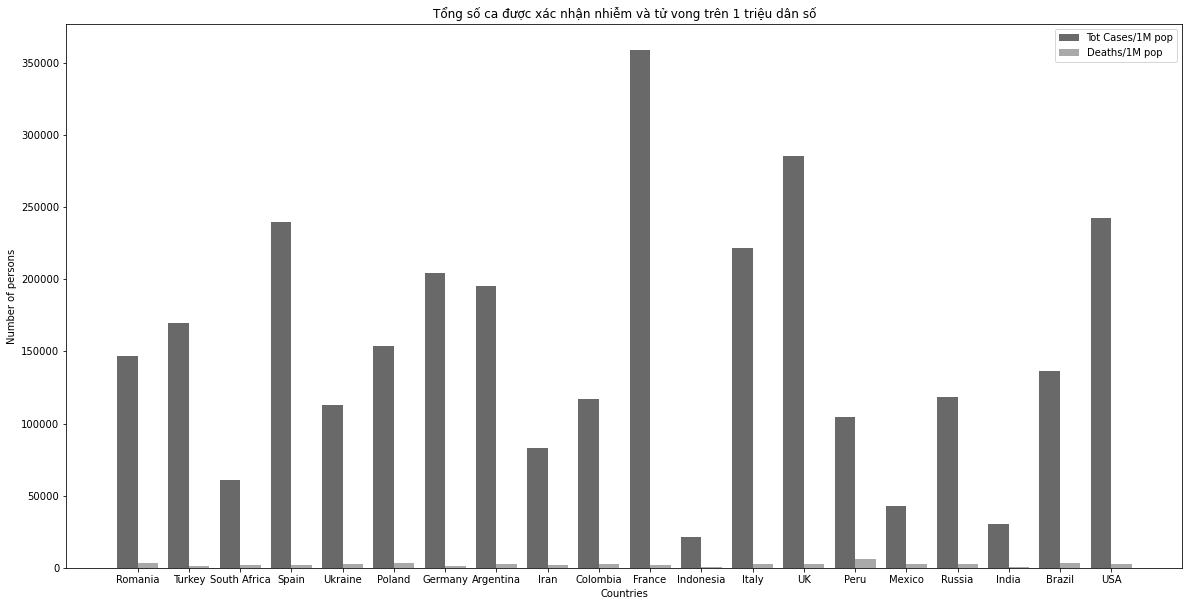

In [15]:
X_axis = np.arange(20)
plt.figure(figsize = (20, 10))
plt.bar(X_axis - 0.2, tempt_data["Tot Cases/1M pop"], 0.4, label = "Tot Cases/1M pop", color="dimgray")
plt.bar(X_axis + 0.2, tempt_data["Deaths/1M pop"], 0.4, label = "Deaths/1M pop", color="darkgray")

plt.xticks(X_axis, tempt_data["Country,Other"])
plt.xlabel("Countries")
plt.ylabel("Number of persons")
plt.title("Tổng số ca được xác nhận nhiễm và tử vong trên 1 triệu dân số")
plt.legend()
plt.show()

**Nhận xét:** Tuy nước `Mĩ` có số ca nhiễm cao nhất và vượt trội so với các nước còn lại như có thể thấy ở trên biểu đồ trên của số người nhiễm và tử vong trên 1 triệu dân số thì nước `Mĩ` chỉ ở vị trí thứ 4. Nước dẫn đầu là nước `Pháp` với gần `350000` người nhiễm trên 1 triệu dân số. Lý giải cho vấn đề đó là dân số của nước Mĩ là `329,5 triệu` còn của pháp là `67,39 triệu`.

In [16]:
data = dict(
        type = 'choropleth',
        colorscale = 'gray',
        locations = data_covid['Country,Other'],
        locationmode = "country names",
        z = data_covid['ActiveCases'],
        text = data_covid['Country,Other'],
        colorbar = {'title' : 'ActiveCases'},
      )

In [17]:
plt.figure(figsize=(10, 10))
layout = dict(title = 'Số lượng ca nhiễm hiện tại trên thế giới',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

<Figure size 720x720 with 0 Axes>

**Nhận xét:** Dựa vào map của ở trên ta thấy người bị nhiễm Covid-19 trên thế giới rất lớn và phủ khắp trên thế giới cho thấy mức độ lây loan mạnh mẽ của con viruss này

### 5.  Tiến hành xem mối quan hệ tương quan giữa các biến thông qua `heatmap`

<AxesSubplot:>

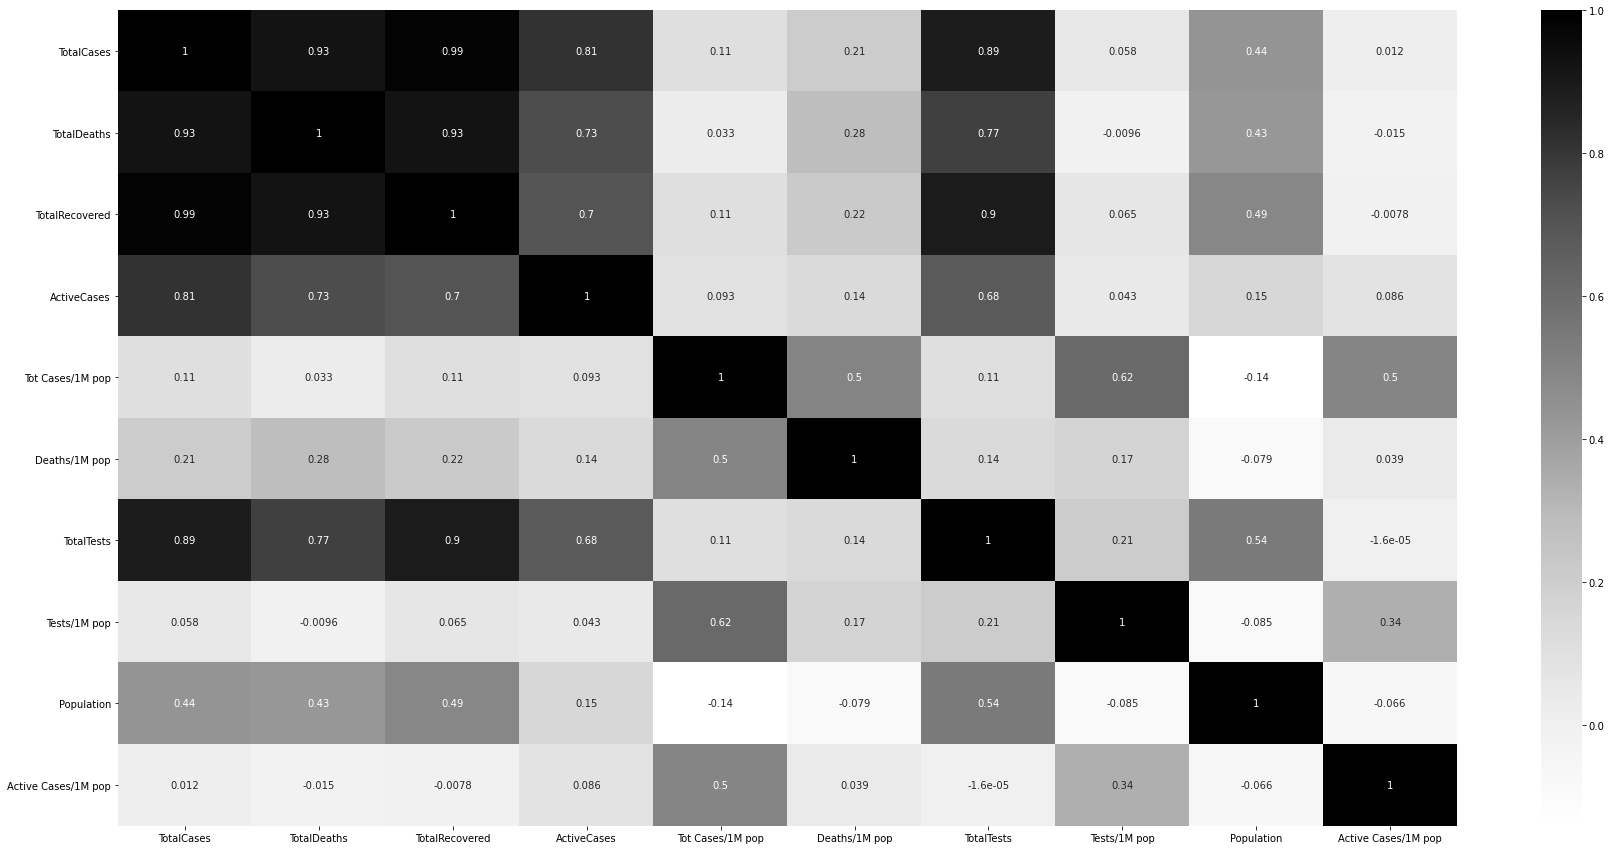

In [18]:
d = data_covid.corr(method='pearson')
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(d, ax=ax, cmap="Greys", annot=True)

**Nhận xét:** Dựa vào heatMap ta thấy bộ 3 `TotalCases`, `TotalDeaths` và `TotalRecovered` có mối quan hệ tương quan chặc chẽ với nhau với hệ số tương quan cao ngất ngưỡng.

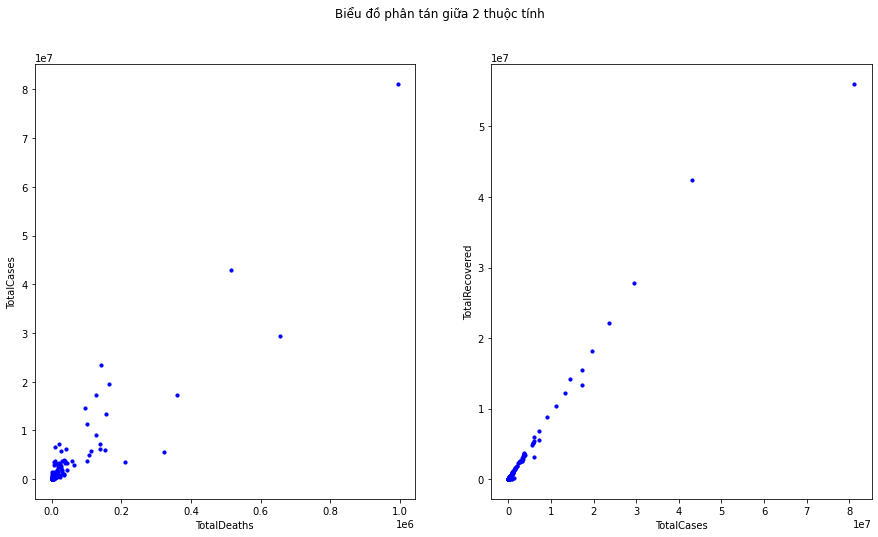

In [19]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

figure.suptitle('Biểu đồ phân tán giữa 2 thuộc tính')
# Add title
ax1.scatter(data_covid['TotalDeaths'], data_covid['TotalCases'], c ="blue", s=10)
ax1.set_xlabel("TotalDeaths")
ax1.set_ylabel("TotalCases")

ax2.scatter(data_covid['TotalCases'],data_covid['TotalRecovered'], c ="blue", s=10)
ax2.set_xlabel("TotalCases")
ax2.set_ylabel("TotalRecovered")

plt.show()

**Nhận xét:** Ở 2 biểu đồ ta dễ dàng nhận ra khi các cặp thuộc tính gần như có mối quan hệ tuyến tính. Khi thuộc tích `TotalCases` tăng thì `TotalRecovred` và `TotalDeaths` cũng tăng theo. Cũng dễ hiểu ở tình huống này vì khi 1 người bị nhiễm bệnh chỉ xảy ra 1 trong 2 trường hơp khỏi bệnh hoặc không qua khỏi.

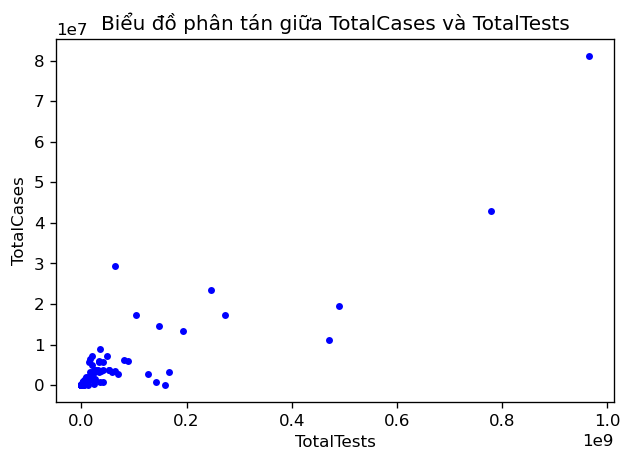

In [20]:
plt.figure(dpi=120)
plt.scatter( data_covid["TotalTests"], data_covid["TotalCases"], c ="blue", s=10)
plt.xlabel("TotalTests")
plt.ylabel("TotalCases")
plt.title("Biểu đồ phân tán giữa TotalCases và TotalTests")
plt.show()

**Nhận xét:** Ta có hệ số tương quan `0.89` khá cao và nhìn vào biểu đồ jointplot ta thấy có mối quan hệ đồng biến. Khi ta tăng `TotalTests` thì qua đó `TotalCases` đồng thời tăng theo. Điều đó có nghĩa là khi người được test `covid-19` tăng lên qua đó phát hiện ra nhiều người bị mắc `Covid-19` trong cộng đồng. Đồng thời cũng giải thích lý do tại sao ở `Việt Nam` khi dịch bùng phát mạnh ở thành phố hồ chí mình thì bộ y tế đã ra sức tạo ra nhiều đợt test Covid-19 ở mỗi địa phương, qua đó hi vọng có thể phát hiện sớm người mắc Covid-19 để có thể dập dịch tốt hơn.

## Tổng kết

#### - Độ nguy hiểm và tốc độ lây loan nhanh của Covid 19 vượt trội so với 3 loại dịch bệnh trước đây. 
#### - Châu Âu có số ca nhiễm cao nhất chiếm hơn 1/3 thế giới và lý do Châu Âu có số ca nhiễm cao như vậy là do trong châu âu có 8 nước nằm trong top20 có số ca nhiễm cao nhất điều đó dẫn tới tổng số ca nhiễm ở cả Châu Âu tăng cao
#### - Nước Mĩ có số ca nhiễm và tử vong cao nhất thế giới,và vượt trột với các nước còn lại trên thế giới
#### - Tuy Mĩ có số ca nhiễm cao nhất thế giới nhưng Pháp lại là top1 về số ca nhiễm trên 1 triệu dân số
#### - Tồn tại mối quan hệ nhân quả: khi số lượng ca nhiễm tăng thì số lượng ca tử vong và hồi phục đều tăng theo 
#### - Việt Nam giai đoạn đầu trong bùng phát dịch bệnh trên thế giới là nằm trong nhóm quốc gia phòng chống dịch tốt nhất nhưng dựa vào bảng số liệu ngày 13/03/2022 thì Việt Nam lại nằm trong Top20 nước có số ca nhiễm cao nhất 